In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
import tensorflow as tf

In [26]:
tf.__version__

'1.13.1'

## MNIST数据集练习

In [27]:
from keras.datasets import mnist

In [28]:
mnist_data = mnist.load_data()

In [29]:
type(mnist_data)

tuple

In [30]:
len(mnist_data)

2

In [31]:
type(mnist_data[0])

tuple

In [32]:
(train_images, train_labels), (test_images, test_labels) = mnist_data

In [33]:
train_images.shape

(60000, 28, 28)

In [34]:
train_labels.shape

(60000,)

In [35]:
test_images.shape

(10000, 28, 28)

In [36]:
test_labels.shape

(10000,)

In [37]:
img = train_images[0,:,:]
img.shape

(28, 28)

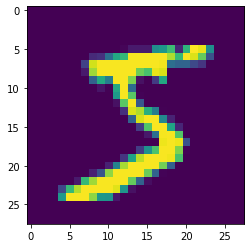

In [38]:
plt.imshow(img)

In [39]:
from keras import models
from keras import layers

定义模型

In [40]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape = (28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [41]:
network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


编译模型

In [42]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

准备图像数据

In [43]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [44]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [45]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.2583 - accuracy: 0.9246
Epoch 2/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.1036 - accuracy: 0.9690
Epoch 3/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.0687 - accuracy: 0.9793
Epoch 4/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.0492 - accuracy: 0.9851
Epoch 5/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.0374 - accuracy: 0.9892


In [46]:
network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 62us/step


[0.07661306103027891, 0.978600025177002]

## IMDB数据集练习

In [47]:
from keras.datasets import imdb

In [48]:
imdb_data = imdb.load_data()

17465344/17464789 [==============================] - 19s 1us/step


In [49]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [50]:
train_data.shape

(25000,)

In [51]:
test_data.shape

(25000,)

In [52]:
type(train_data[0])

list

In [53]:
train_data[0][0:5]

[1, 14, 22, 16, 43]

In [54]:
# 每条句子的长度都不一样
[len(sentence) for sentence in train_data][0:10]

[218, 189, 141, 550, 147, 43, 123, 562, 233, 130]

In [55]:
# 获取每个单词的word-index字典
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 3s 2us/step


In [56]:
type(word_index)

dict

In [57]:
len(word_index)

88584

In [58]:
list(word_index.items())[0:5]

[('fawn', 34701),
 ('tsukino', 52006),
 ('nunnery', 52007),
 ('sonja', 16816),
 ('vani', 63951)]

以下将train_data里的index转回原来的word

In [59]:
reverse_word_index = dict([(index, word) for (word, index) in word_index.items()])

In [60]:
decode_review = [reverse_word_index.get(index-3, '?') for index in train_data[0]]
decode_review[0:6]

['?', 'this', 'film', 'was', 'just', 'brilliant']

### 数据预处理

In [61]:
train_data[0][0:5]

[1, 14, 22, 16, 43]

In [62]:
def review_vectorize(review, dict_len=10000):
    result_matrix = np.zeros((len(review), dict_len))
    for i,sentence in enumerate(review):
        result_matrix[i, sentence] = 1.0
    return result_matrix

In [63]:
train_matrix = review_vectorize(train_data)
test_matrix = review_vectorize(test_data)

In [64]:
train_matrix.shape

(25000, 10000)

In [65]:
test_matrix.shape

(25000, 10000)

In [66]:
labels_train = np.array(train_labels).astype("float32")
labels_test = np.array(test_labels).astype("float32")

In [67]:
X_val = train_matrix[0:10000]
X_train = train_matrix[10000:]
y_val = labels_train[0:10000]
y_train = labels_train[10000:]

### 建模

In [68]:
model = models.Sequential()
model.add(layers.Dense(16, activation = "relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [69]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics = ['accuracy'])

In [70]:
model.fit(X_train,y_train, epochs=5, batch_size=512,  validation_data=[X_val, y_val])

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 3s 208us/step - loss: 0.5069 - accuracy: 0.7885 - val_loss: 0.3779 - val_accuracy: 0.8693
Epoch 2/5
15000/15000 [==============================] - 1s 97us/step - loss: 0.2978 - accuracy: 0.9047 - val_loss: 0.3430 - val_accuracy: 0.8545
Epoch 3/5
15000/15000 [==============================] - 1s 82us/step - loss: 0.2205 - accuracy: 0.9283 - val_loss: 0.2775 - val_accuracy: 0.8917
Epoch 4/5
15000/15000 [==============================] - 1s 97us/step - loss: 0.1696 - accuracy: 0.9460 - val_loss: 0.2826 - val_accuracy: 0.8888
Epoch 5/5
15000/15000 [==============================] - 1s 89us/step - loss: 0.1436 - accuracy: 0.9525 - val_loss: 0.2884 - val_accuracy: 0.8873


## Word Embedding

### Embedding层的使用

Embedding层用于将正整数（索引值）转换为固定尺寸的稠密向量。它只能在第一层使用。

### Embedding层用于IMDB数据集

In [71]:
from keras.datasets import imdb

In [91]:
from keras import preprocessing

In [77]:
# 字典的所选取的最大长度
max_features = 10000
# 每条评论的截断长度
max_len = 20

In [78]:
(x_train, y_train), (x_test, y_test) = imdb.load_data( num_words=max_features)

In [79]:
x_train.shape

(25000,)

In [80]:
y_train.shape

(25000,)

In [82]:
len(x_train[0])

218

In [86]:
# pad_sequances用于填充序列，也就是将x_train中不同长度的向量填充成同样的长度（尾部填充）
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

In [87]:
x_train.shape

(25000, 20)

In [88]:
type(x_train)

numpy.ndarray

In [89]:
x_train[0,:]

array([  65,   16,   38, 1334,   88,   12,   16,  283,    5,   16, 4472,
        113,  103,   32,   15,   16, 5345,   19,  178,   32], dtype=int32)

In [90]:
from keras.models import Sequential
from  keras.layers import Flatten,Dense,Embedding

In [92]:
model = Sequential()

In [93]:
model.add(Embedding(10000,8,input_length=max_len))

In [94]:
model.add(Flatten())

In [95]:
model.add(Dense(1, activation='sigmoid'))

In [96]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [97]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [98]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 4s 192us/step - loss: 0.6721 - acc: 0.6233 - val_loss: 0.6252 - val_acc: 0.6954
Epoch 2/5
20000/20000 [==============================] - 3s 141us/step - loss: 0.5497 - acc: 0.7505 - val_loss: 0.5312 - val_acc: 0.7324
Epoch 3/5
20000/20000 [==============================] - 3s 140us/step - loss: 0.4662 - acc: 0.7857 - val_loss: 0.5029 - val_acc: 0.7464
Epoch 4/5
20000/20000 [==============================] - 3s 139us/step - loss: 0.4230 - acc: 0.8084 - val_loss: 0.4961 - val_acc: 0.7528
Epoch 5/5
20000/20000 [==============================] - 3s 140us/step - loss: 0.3937 - acc: 0.8256 - val_loss: 0.4960 - val_acc: 0.7552
